In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Задать начальные состояния двух математических подсистем A и
B с помощью векторов в их Гильбертовых пространствах

In [ ]:
A=np.matrix([
    [1],
    [0]])
B=np.matrix([
    [1],
    [0],
    [1],
    [0]])

С помощью тензорного произведения построить вектор в полном
пространстве C в начальный момент времени. Это состояние яв-
ляется неперепутанным, так как оно факторизуется по векторам в
Гильбертовых пространствах каждой подсистемы.

In [ ]:
C = [A[0,0]*B[0,0],
     A[0,0]*B[1,0],
     A[0,0]*B[2,0],
     A[0,0]*B[3,0],
     A[1,0]*B[0,0],
     A[1,0]*B[1,0],
     A[1,0]*B[2,0],
     A[1,0]*B[3,0]]

C

[1, 0, 1, 0, 0, 0, 0, 0]

Ввести оператор взаимодействия между двумя подсистемами


антисимметричная

In [ ]:
f1 = lambda t: - np.sin(t)
f2 = lambda t: np.sin(t)
f3 = lambda t: np.cos(t)
f4 = lambda t: - np.cos(t)*np.cos(t)
f5 = lambda t: np.sin(t)*np.sin(t)

In [ ]:
F= lambda t: np.matrix([[0,     -f2(t),  0,     -f1(t), 0,      0,      0,     0],
                        [f2(t), 0,      0,      0,      0,      0,      0,     0],
                        [0,     0,      0,      0,      0,      0,     -f5(t), 0],
                        [f1(t), 0,      0,      0,      -f4(t), 0,      0,     0],
                        [0,     0,      0,      f4(t),  0,      0,      0,     0],
                        [0,     0,      0,      0,      0,      0,      0,     0],
                        [0,     0,      f5(t),  0,      0,      0,      0,     0],
                        [0,     0,      0,      0,      0,      0,      0,     0]])

Матрица F меняется не сильно на маленьких промежутках времени, поэтому

In [ ]:
N = 10000
t = np.linspace(0, 30, N+1)
delta_t=t[1]-t[0]

In [ ]:
delta_t

0.003

In [ ]:
f = [np.matrix(np.zeros((8,1))) for i in range(N+1)]

f[0] = C
f[0]

[1, 0, 1, 0, 0, 0, 0, 0]

Построить оператор эволюции A и B в полном пространстве C,
который представляет собой матричную экспоненту от оператора
взаимодействия, умноженного на время

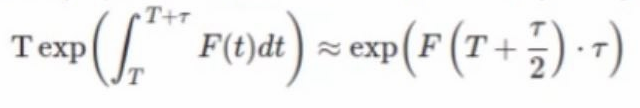

In [ ]:
# матричная экспонента
import scipy
def MyFunction(F, delta_t, i):
    return scipy.linalg.expm(F(i-delta_t/2)*delta_t)


# scipy.linalg # система линейный алгебраических уравнений
# np.linalg # НЕ система


In [ ]:
for i in range(1, N+1):
    f[i] = np.dot(MyFunction(F, delta_t, t[i]), f[i-1])

Написать код, который позволяет получить вектор двух подсистем
A и B в любой момент времени

# НОРМА

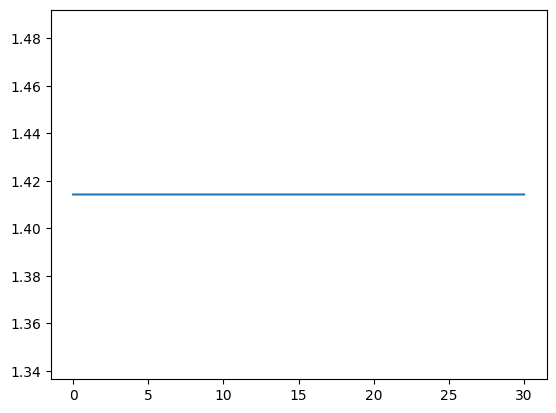

In [ ]:
norma=[np.round(np.linalg.norm(f[i]), 10) for i in range(N+1)]
plt.plot(t,norma)

#КРИТЕРИЙ СПУТАННОСТИ

Написать код, который позволяет вычислить критерий перепутан-
ности двух подсистем в полном Гильбертовом пространстве

In [ ]:
kriteriy=np.zeros(N+1)

for i in range(N+1):
    min = lambda x: np.linalg.norm(f[i] - np.matrix([
                              x[0]*x[2],
                              x[0]*x[3],
                              x[0]*x[4],
                              x[0]*x[5],
                              x[1]*x[2],
                              x[1]*x[3],
                              x[1]*x[4],
                              x[1]*x[5]
                              ]))
    result = scipy.optimize.minimize(min, x0=[0, 3, 2, 1, 1, 0])
    kriteriy[i]=result.fun

Построить график зависимости критерия перепутанности двух под-
систем A и B от времени.

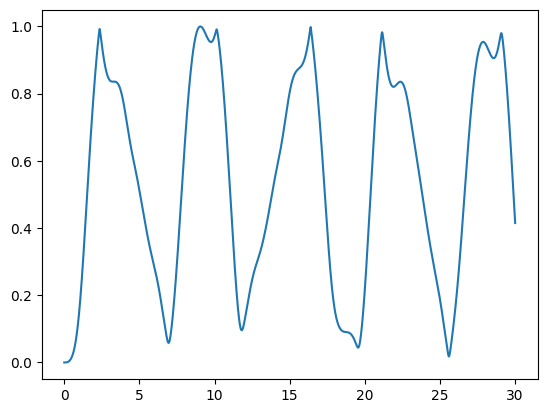

In [ ]:
plt.plot(t, kriteriy)